# **Proyek Analisis Data: Bike Sharing Dataset**


*   Wawan Firgiawan ⛹
*   Kirim Email: [wawanfirgiawan9@gmacil.com](mailto:wawanfirgiawan9@gmail.com) 📧
*  ID Dicoding: https://www.dicoding.com/users/wawanfirgiawan




# **Pertanyaan Bisnis**


> Pada project ini dilakukan analisis pada dataset **Bike Sharing Dataset**, dimana akan menjawab beberapa pernyataan dari analisis sebelumnya, yaitu:


*   Apakah ada pengaruh signifikan dari musim terhadap jumlah pengguna sepeda?
*   Proporsi Penyewaan Sepeda Berdasarkan Musim?
*   Bagaimana Distribusi Jumlah Penyewaan Sepeda Harian?
*   Bagaimana Distribusi Suhu Berdasarkan Musim pada dataset?



# **Menyiapkan semua library yang dibutuhkan**

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# **Data Wrangling**

*Data wrangling* merupakan sebuah proses atau kumpulan kegiatan yang meliputi pengumpulan data *(Gathering data),* penilaian data *(Assessing data),* serta pembersihan data *(Cleaning data)* sebelum data digunakan dalam proses analisis data.

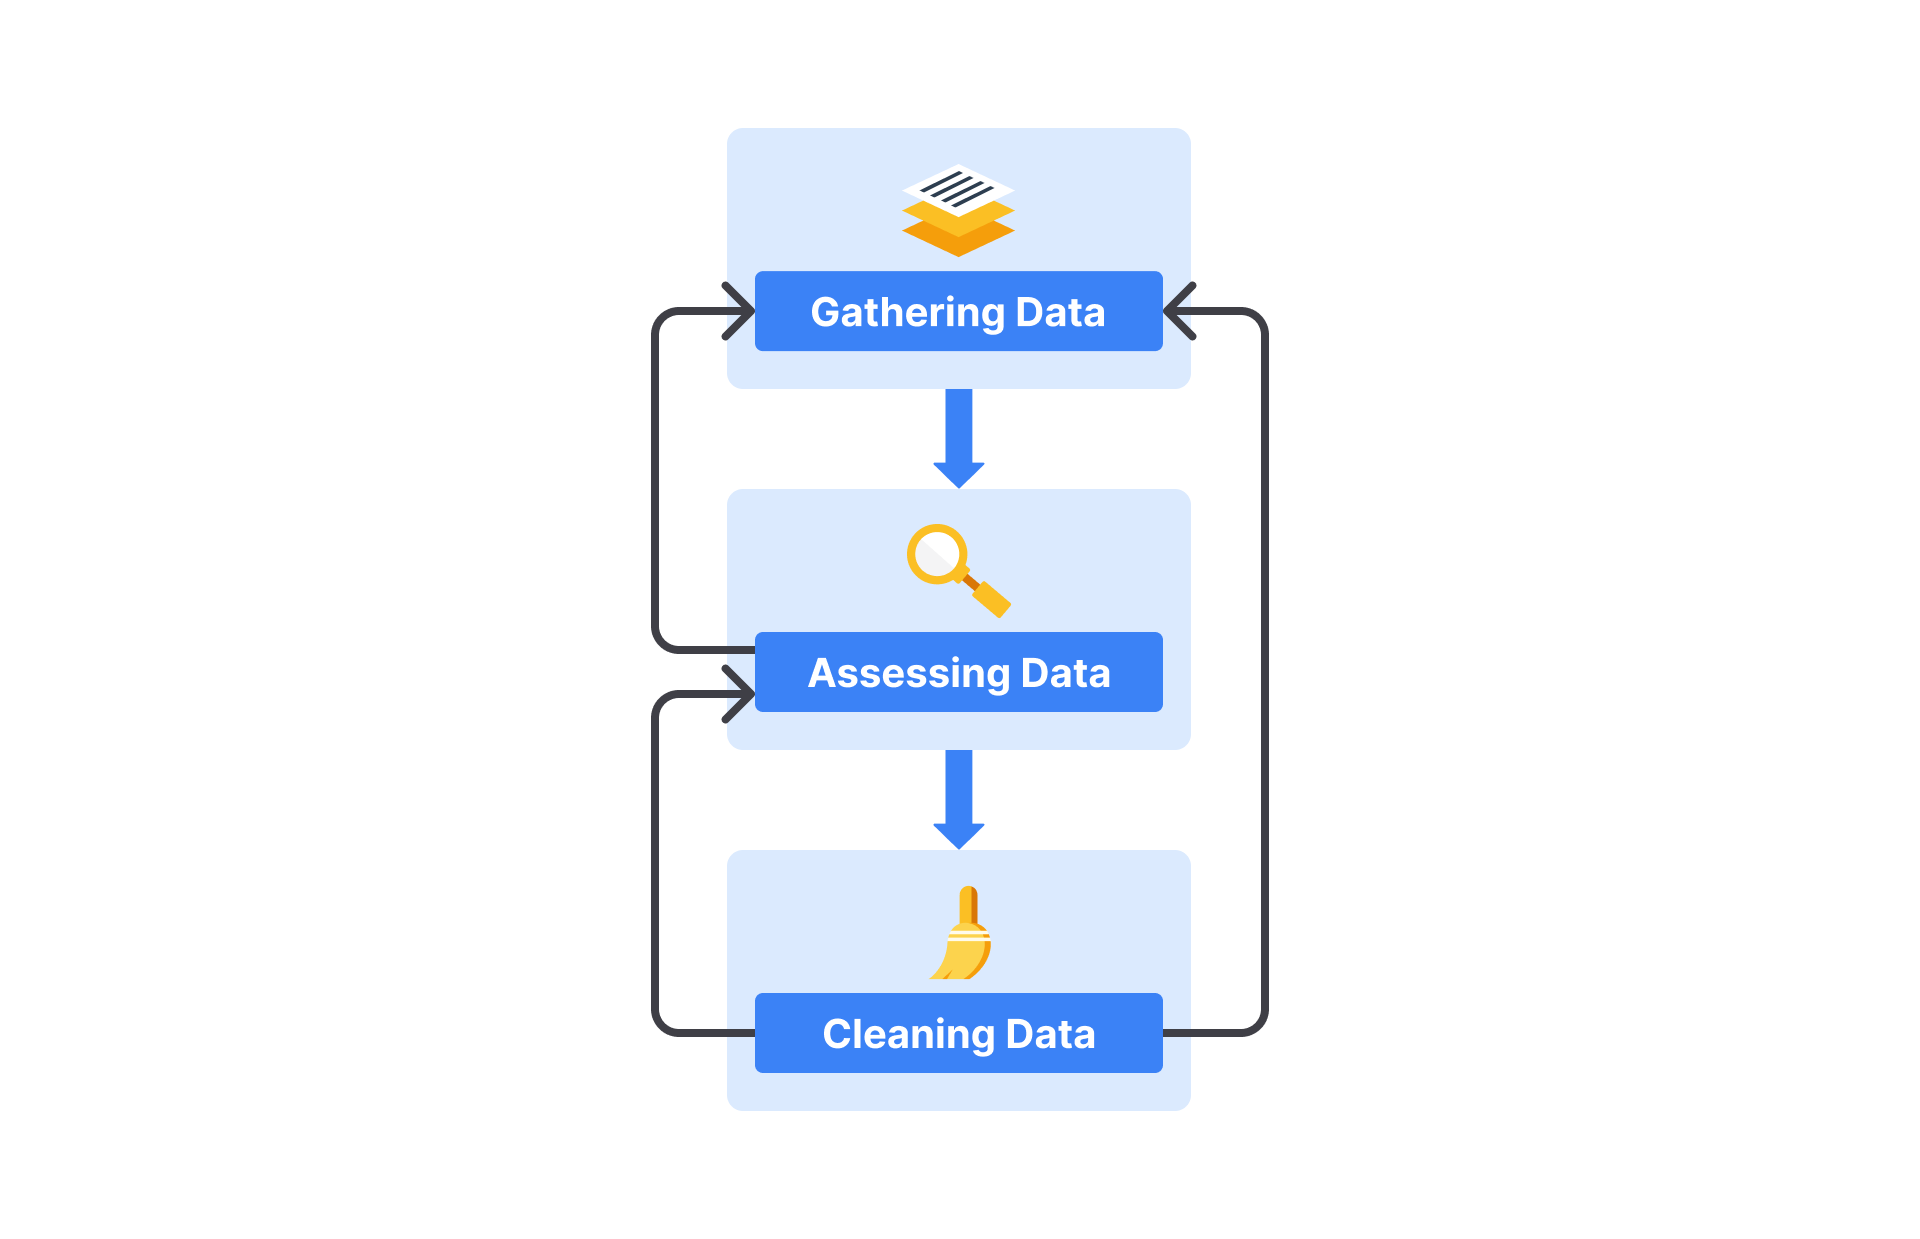

## **Gathering Data**


> Tahap *data wrangling*, dimulai dengan proses pengumpulan data. Pada proses ini kita akan mengumpulkan semua data yang dibutuhkan untuk menjawab semua pertanyaan atau masalah bisnis yang ingin kita hadapi.


In [70]:
# Load Data day.csv
df_day = pd.read_csv("/content/drive/MyDrive/Program/Analisis Data - Dicoding/Data/day.csv")
df_hour = pd.read_csv("/content/drive/MyDrive/Program/Analisis Data - Dicoding/Data/hour.csv")

In [71]:
# Print Dataset day.csv
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


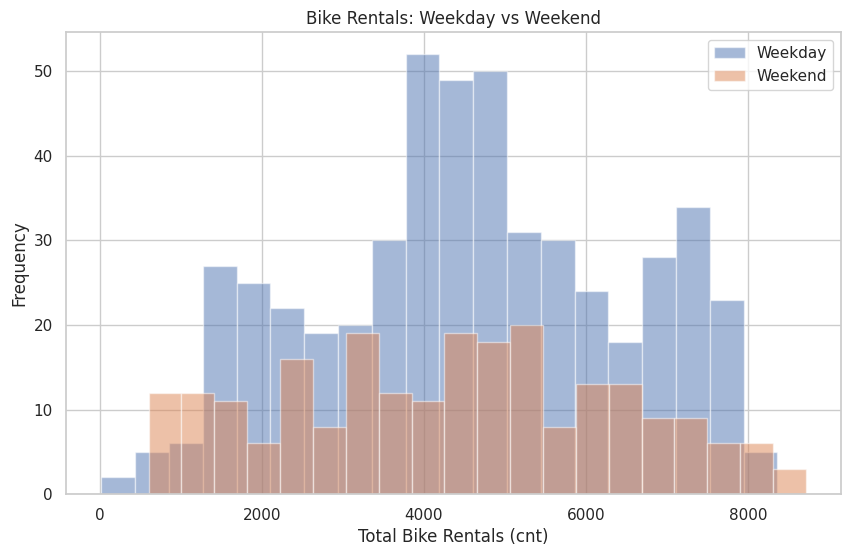

In [72]:
plt.figure(figsize=(10, 6))
plt.hist(df_day['cnt'][df_day['workingday'] == 1], bins=20, alpha=0.5, label='Weekday')
plt.hist(df_day['cnt'][df_day['workingday'] == 0], bins=20, alpha=0.5, label='Weekend')
plt.xlabel('Total Bike Rentals (cnt)')
plt.ylabel('Frequency')
plt.title('Bike Rentals: Weekday vs Weekend')
_ = plt.legend()



> Distribusi Penyewaan Sepeda: Pada hari kerja *(Weekday)*, terdapat penyewaan sepeda yang jauh lebih banyak secara keseluruhan dibandingkan akhir pekan (Weekend). Hal ini terlihat dari tingginya frekuensi pada beberapa rentang jumlah penyewaan yang memiliki bar berwarna biru *(Weekday)* yang lebih tinggi daripada yang berwarna oranye *(Weekend*).



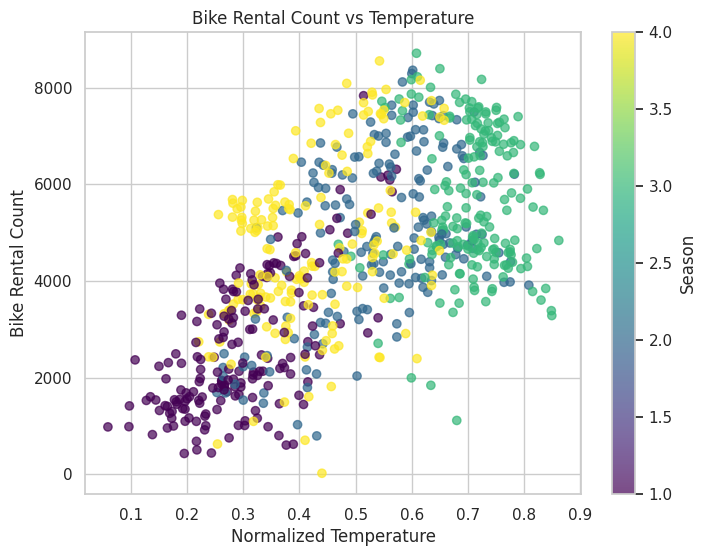

In [73]:
plt.figure(figsize=(8, 6))
plt.scatter(df_day['temp'], df_day['cnt'], c=df_day['season'], cmap='viridis', alpha=0.7)
plt.xlabel('Normalized Temperature')
plt.ylabel('Bike Rental Count')
plt.title('Bike Rental Count vs Temperature')
_ = plt.colorbar(label='Season')





> 1. Terdapat tren positif antara suhu yang dinormalisasi dan jumlah penyewaan sepeda. Saat suhu meningkat, jumlah penyewaan sepeda juga cenderung meningkat. Hal ini menunjukkan bahwa cuaca yang lebih hangat dapat meningkatkan aktivitas bersepeda.


> 2. Secara keseluruhan, suhu yang lebih hangat dan musim yang lebih cerah (seperti musim panas) mendorong peningkatan jumlah penyewaan sepeda. Grafik ini memberikan wawasan tentang tren musiman dan pengaruh suhu terhadap permintaan penyewaan sepeda, yang dapat berguna bagi manajemen dalam merencanakan operasional berdasarkan musim.





In [74]:
# Print Dataset hour.csv
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


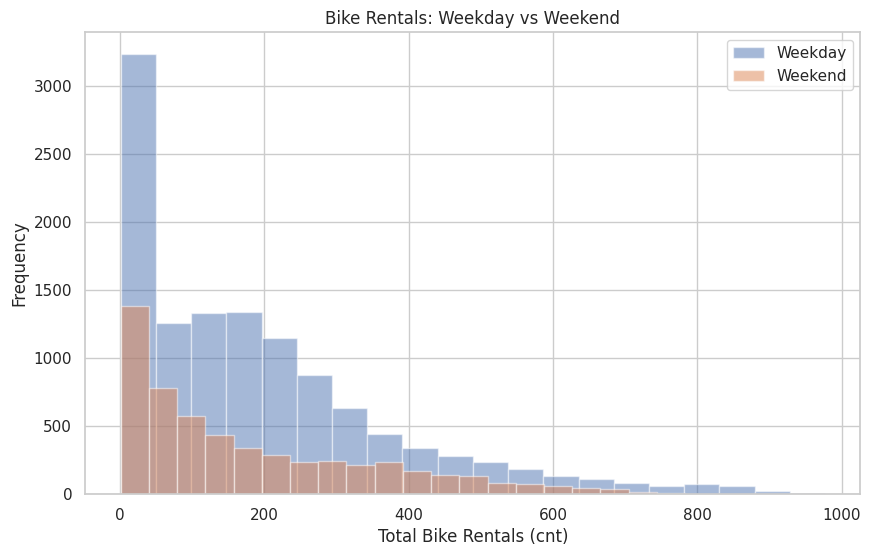

In [75]:
plt.figure(figsize=(10, 6))
plt.hist(df_hour['cnt'][df_hour['workingday'] == 1], bins=20, alpha=0.5, label='Weekday')
plt.hist(df_hour['cnt'][df_hour['workingday'] == 0], bins=20, alpha=0.5, label='Weekend')
plt.xlabel('Total Bike Rentals (cnt)')
plt.ylabel('Frequency')
plt.title('Bike Rentals: Weekday vs Weekend')
_ = plt.legend()



> Grafik menunjukkan bahwa frekuensi penyewaan sepeda dalam jumlah rendah lebih tinggi baik pada hari kerja *(Weekday)* maupun akhir pekan *(Weekend),* dengan distribusi yang sangat menurun seiring meningkatnya jumlah penyewaan. Pada hari kerja, penyewaan sepeda sedikit lebih tinggi dibandingkan akhir pekan pada setiap rentang, terutama pada jumlah yang sangat rendah, yang menunjukkan bahwa aktivitas bersepeda cenderung lebih konsisten pada hari kerja.



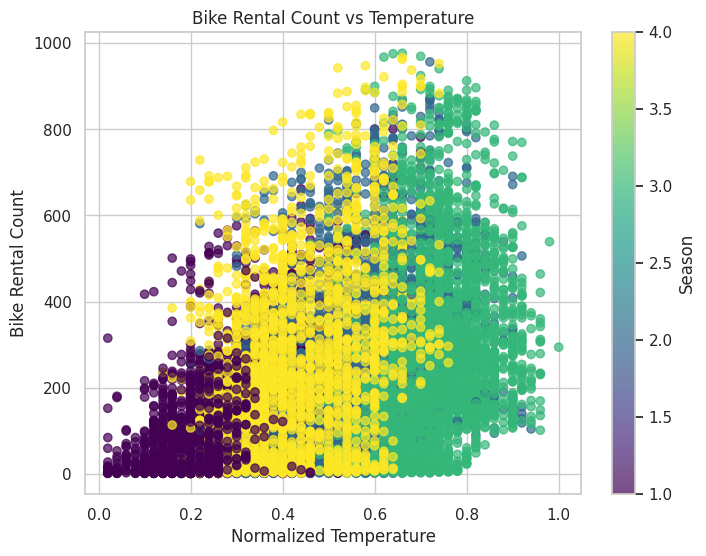

In [76]:
plt.figure(figsize=(8, 6))
plt.scatter(df_hour['temp'], df_hour['cnt'], c=df_hour['season'], cmap='viridis', alpha=0.7)
plt.xlabel('Normalized Temperature')
plt.ylabel('Bike Rental Count')
plt.title('Bike Rental Count vs Temperature')
_ = plt.colorbar(label='Season')



> Grafik ini menunjukkan hubungan antara jumlah penyewaan sepeda dan suhu yang dinormalisasi, dengan warna titik yang mewakili musim *(Season).* Terlihat bahwa jumlah penyewaan sepeda cenderung meningkat seiring dengan kenaikan suhu, terutama pada musim panas (warna kuning) dan musim semi (warna hijau). Di musim dingin (warna ungu), penyewaan sepeda lebih sedikit dan terjadi pada suhu yang lebih rendah. Hal ini menunjukkan bahwa suhu yang lebih tinggi, terutama di musim yang lebih hangat, berkorelasi dengan peningkatan aktivitas bersepeda.



### Pada project ini saya memilih ***Bike Sharing Dataset***, maka saya mengambil file day.csv sebagai dataset yang akan digunakan dalam proses analisis data.

# **Assessing Data**


> Setelah semua data yang dibutuhkan terkumpul, proses selanjutnya ialah penilaian terhadap data tersebut. Proses ini dilakukan untuk menilai kualitas dan struktur dari sebuah data. Selain itu, proses ini juga bertujuan untuk mengidentifikasi berbagai masalah yang terdapat dalam data, seperti missing value, unstandard value, dll.



In [77]:
# Cek Missing Value pada dataset
df_day.isnull().sum() # Mengecek adanya nilai yang hilang dari sebuah data dan biasanya direpresentasikan sebagai nilai NaN dalam library pandas.

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0




```
Dari data diatas tidak terdapat Missing Value pada setiap variabel yang disajikan dalam dataset yang digunakan.

```



In [78]:
# Cek Invalid value pada dataset
df_day.duplicated().sum() # Mengecek nilai yang tidak masuk akal, tidak sesuai dengan ketentuan, dan background knowledge dari data tersebut.

0



```
Dari data diatas tidak terdapat Invalid Value pada setiap variabel yang disajikan dalam dataset yang digunakan.

```



Inaccurate Values:
{}

Inconsistent Values:
{}

Outliers:
{'holiday': 16     1
51     1
104    1
149    1
184    1
247    1
282    1
314    1
327    1
359    1
366    1
380    1
415    1
471    1
513    1
550    1
611    1
646    1
681    1
691    1
724    1
Name: holiday, dtype: int64, 'hum': 49    0.187917
68    0.000000
Name: hum, dtype: float64, 'windspeed': 49     0.507463
432    0.441563
Name: windspeed, dtype: float64, 'casual': 184    3065
441    3155
462    3252
504    3410
512    3283
532    2963
623    3160
644    3031
Name: casual, dtype: int64}


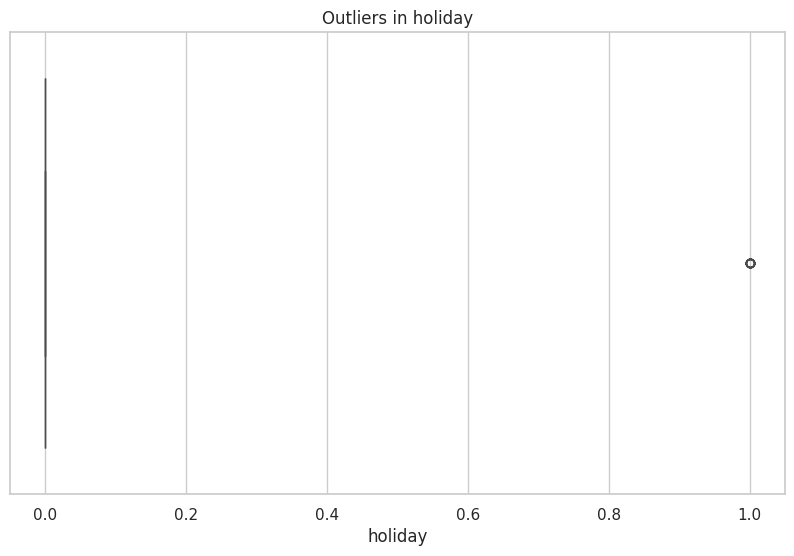

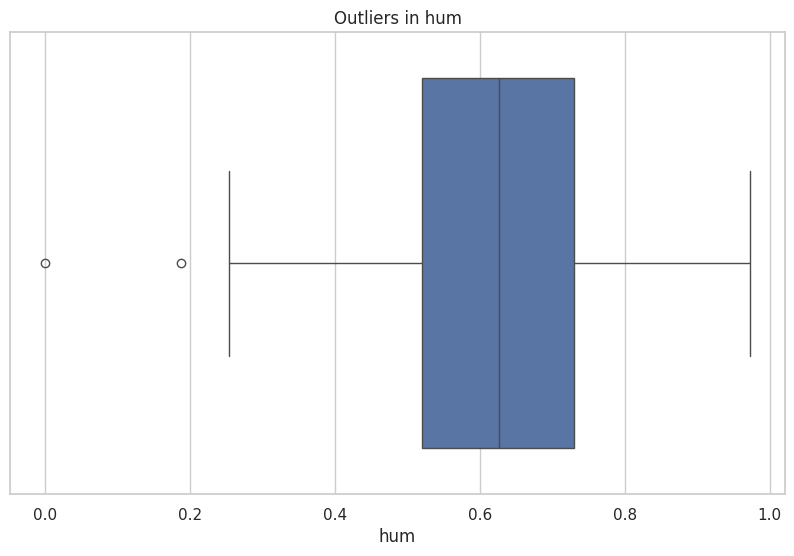

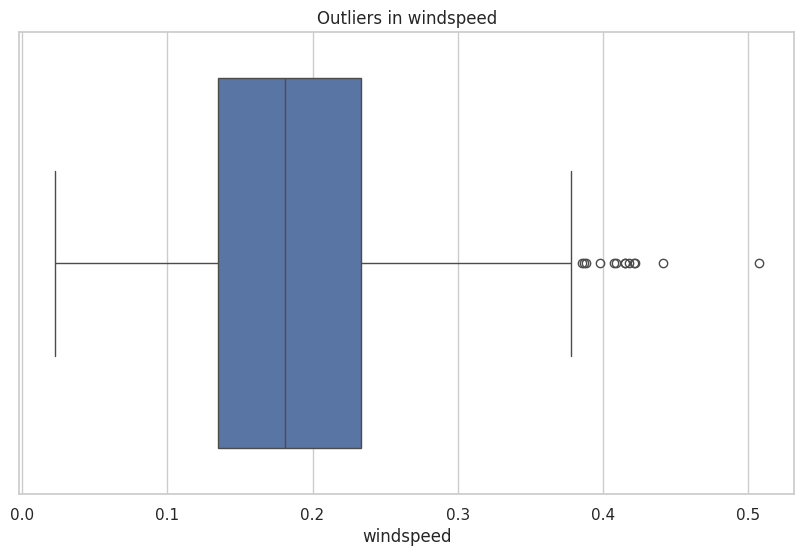

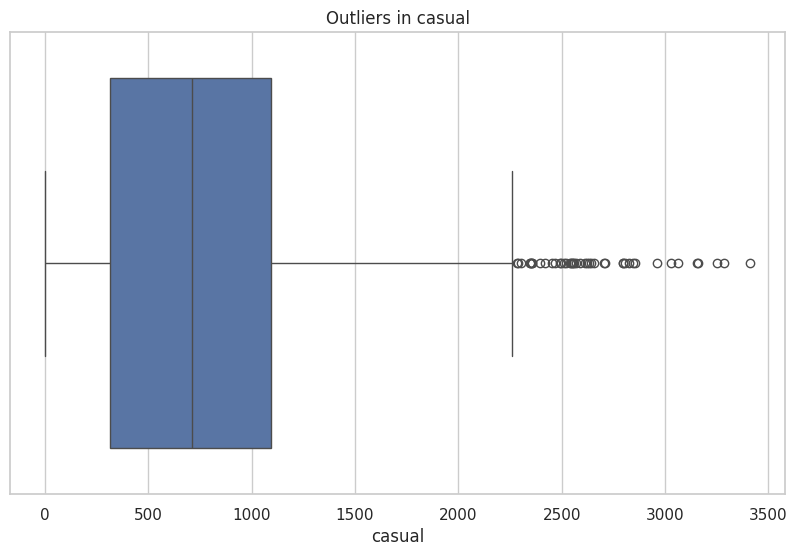

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# Check for Inaccurate Values (misalnya, nilai negatif yang tidak diharapkan pada kolom numerik)
def check_inaccurate_values(df):
    inaccurate_values = {}
    for column in df.select_dtypes(include=[np.number]):  # Hanya kolom numerik
        if df[column].min() < 0:  # Asumsi: tidak ada nilai negatif yang diharapkan
            inaccurate_values[column] = df[df[column] < 0][column]
    return inaccurate_values

# Tentukan nilai yang diizinkan untuk kolom kategori berdasarkan struktur yang teramati
allowed_values = {
    'season': [1, 2, 3, 4],
    'yr': [0, 1],
    'mnth': list(range(1, 13)),
    'holiday': [0, 1],
    'weekday': list(range(0, 7)),
    'workingday': [0, 1],
    'weathersit': [1, 2, 3, 4]
}

inconsistent_values = {}
for column, allowed in allowed_values.items():
    inconsistent_values[column] = df_day[~df_day[column].isin(allowed)][column]

# Hapus entri kosong dari nilai yang tidak konsisten
inconsistent_values = {k: v for k, v in inconsistent_values.items() if not v.empty}

# Detect Outliers pada Z-score
def detect_outliers(df, threshold=3):
    outliers = {}
    for column in df.select_dtypes(include=[np.number]):  # Hanya kolom numerik
        z_scores = zscore(df[column])
        outliers[column] = df[np.abs(z_scores) > threshold][column]
    # Hapus kolom tanpa outliers
    outliers = {k: v for k, v in outliers.items() if not v.empty}
    return outliers

# Menjalankan pengecekan
inaccurate_values = check_inaccurate_values(df_day)
outliers = detect_outliers(df_day)

# Menampilkan hasil
print("Inaccurate Values:")
print(inaccurate_values)

print("\nInconsistent Values:")
print(inconsistent_values)

print("\nOutliers:")
print(outliers)

# Fungsi untuk memvisualisasikan outlier di kolom dengan outlier
def plot_outliers(df, columns):
    sns.set(style="whitegrid")
    for column in columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[column])
        plt.title(f"Outliers in {column}")
        plt.xlabel(column)
        plt.show()

# Visualisasi outliers pada kolom yang terdeteksi
outlier_columns = list(outliers.keys())
plot_outliers(df_day, outlier_columns)

**Visualisasi di atas menunjukkan outliers untuk beberapa kolom pada dataset Anda:**



1.   **Holiday:** Terdapat nilai yang dianggap outlier, kemungkinan besar karena frekuensi hari libur yang jarang terjadi.
2. **Humidity (hum):** Dua titik data dengan kelembaban yang sangat rendah terdeteksi sebagai outliers.
3. **Windspeed:** Terdapat beberapa nilai kecepatan angin yang tinggi yang terdeteksi sebagai outliers.
4. **Casual Rentals (casual):** Beberapa nilai pada kolom penyewaan pengguna tidak terdaftar menunjukkan angka yang sangat tinggi dan dianggap outliers.



In [80]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [81]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [82]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# **Cleaning Data**


> Apabila pada proses sebelumnya kita menemukan masalah (missing value, outlier, dll.) yang terdapat di dalam sebuah data, masalah tersebut harus dibersihkan sebelum masuk tahap analisis data. Terdapat beberapa teknik yang dapat kita gunakan untuk membersihkan data. Seluruh teknik tersebut akan kita pelajari pada beberapa materi ke depan.



In [83]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [84]:
# Check unique values in the 'holiday' column of df_day
unique_holiday_values = df_day['holiday'].unique()
unique_holiday_values

array([0, 1])

In [85]:
# Mengatasi Duplicate Data
df_day.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [86]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [87]:
# Cek Unique pada dataset

# Checking unique values
unique_values = {column: df_day[column].unique() for column in df_day.columns}

# Display unique values
for column, values in unique_values.items():
    print(f"Column '{column}':")
    print(values)
    print("\n")

Column 'instant':
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 

In [88]:
# Checking unique values for specific columns in the dataset df_day

# Columns of interest
columns_of_interest = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

# Extract unique values for each specified column
unique_values_interest = {column: df_day[column].unique() for column in columns_of_interest}

# Display unique values for specified columns
unique_values_interest

{'season': array([1, 2, 3, 4]),
 'yr': array([0, 1]),
 'mnth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 'holiday': array([0, 1]),
 'weekday': array([6, 0, 1, 2, 3, 4, 5]),
 'workingday': array([0, 1]),
 'weathersit': array([2, 1, 3])}

In [89]:
# Mapping values ke kategori deskriptif

# Define mappings for each column
mapping = {
    'season': {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'},
    'year': {0: '2011', 1: '2012'},
    'month': {
        1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May',
        6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October',
        11: 'November', 12: 'December'
    },
    'holiday': {0: 'No', 1: 'Yes'},
    'weekday': {
        0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
        4: 'Thursday', 5: 'Friday', 6: 'Saturday'
    },
    'workingday': {0: 'No', 1: 'Yes'},
    'weathersit': {
        1: 'Clear/Partly Cloudy', 2: 'Misty/Cloudy', 3: 'Light Rain/Snow',
        4: 'Heavy Rain/Snow/Storm'
    }
}

# Dengan asumsi df_day dimuat, terapkan pemetaan ke DataFrame
df_day_mapped = df_day.copy()

for column, map_dict in mapping.items():
    if column in df_day_mapped.columns:
        df_day_mapped[column] = df_day_mapped[column].map(map_dict)

# Menampilkan DataFrame yang dimodifikasi untuk mengonfirmasi perubahan
df_day_mapped.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,1,No,Saturday,No,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,1,No,Sunday,No,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,1,No,Monday,Yes,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,0,1,No,Tuesday,Yes,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,0,1,No,Wednesday,Yes,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [90]:
# Perbaiki nama dari tabel
df_day = df_day.rename(columns={'dteday': 'date_day', 'yr': 'year', 'mnth': 'month', 'cnt': 'count'})

df_day.columns

Index(['instant', 'date_day', 'season', 'year', 'month', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

In [91]:
# melihat lebih banyak parameter statistik serta menyertakan kolom non-numerik
df_day.describe(include="all")

,instant,date_day,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>],
       [<Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>, <Axes: >]], dtype=object)

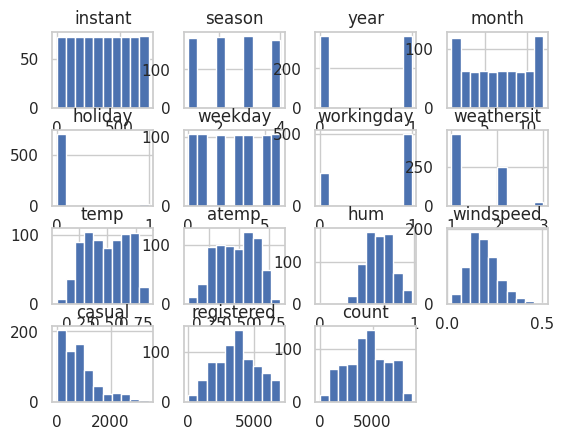

In [92]:
# Membuat plot histogram dari kolom numerik pada sebuah DataFrame
df_day.hist()



> Kesimpulan dari hasil sebelumnya diperoleh hasil dimana sudah tidak ada data yang disajikan mempunyai masalah dalam sebarannya sehingga dapat dilakukan proses analisis.



In [93]:
# Mengelompokkan Data

def create_pivot_table(df, index, columns=None, values=None, aggfunc='mean'):
    """
    Membuat pivot table yang efisien dengan menggunakan groupby dan pivot_table.

    Parameters:
    df (pd.DataFrame): Dataset dalam bentuk DataFrame.
    index (str or list): Kolom yang akan digunakan sebagai index pada pivot table.
    columns (str or list, optional): Kolom yang akan digunakan sebagai kolom pada pivot table. Default: None.
    values (str or list, optional): Kolom yang akan di-aggregate dalam pivot table. Default: None.
    aggfunc (str or function, optional): Fungsi agregasi, bisa 'mean', 'sum', 'count', atau fungsi kustom lainnya. Default: 'mean'.

    Returns:
    pd.DataFrame: Pivot table hasil yang dapat dilihat atau dianalisis lebih lanjut.
    """
    if columns:
        # Menggunakan pivot_table untuk hasil lebih terstruktur jika ada 'columns'
        pivot_table = pd.pivot_table(df, index=index, columns=columns, values=values, aggfunc=aggfunc)
    else:
        # Jika tidak ada 'columns', groupby sederhana akan lebih cepat
        pivot_table = df.groupby(index)[values].agg(aggfunc)

    return pivot_table

pivot_df = create_pivot_table(df_day, index='season', columns='holiday', values='count', aggfunc='sum')
print(pivot_df)

holiday        0      1
season                 
1         459533  11815
2         898952  19637
3        1038298  22831
4         817461  24152


In [94]:
df_day.groupby(by="casual").instant.nunique().sort_values(ascending=False)

,instant
casual,
968,4
120,4
639,3
653,3
140,3
...,...
551,1
550,1
548,1


In [95]:
df_day.groupby(by="registered").instant.nunique().sort_values(ascending=False)

,instant
registered,
6248,3
1707,3
4841,3
3248,2
3413,2
...,...
3077,1
3084,1
3100,1




> Berdasarkan hasil di atas, dapat dilihat bahwa persebaran pelanggan Sepeda cukup merata baik secara casual dan registed.


# **Exploratory Data Analysis (EDA)**

In [96]:
# Tampilkan kembali dataset Fix
df_day_mapped.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,1,No,Saturday,No,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Winter,0,1,No,Sunday,No,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Winter,0,1,No,Monday,Yes,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Winter,0,1,No,Tuesday,Yes,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Winter,0,1,No,Wednesday,Yes,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600




### **Berikut adalah definisi dari masing-masing kolom dalam dataset terkait penyewaan sepeda:**

1. **instant:** Indeks atau ID unik untuk setiap observasi atau baris dalam dataset.

2. **date_day:** Tanggal pencatatan data dalam format harian. Biasanya disimpan dalam format YYYY-MM-DD, ini menunjukkan hari tertentu saat data diambil.

3. **season:** Musim saat data diambil, biasanya direpresentasikan dengan angka:
1: Musim dingin
2: Musim semi
3: Musim panas
4: Musim gugur

4. **year:** Tahun saat data diambil, sering kali direpresentasikan dengan 0 dan 1:
0: Tahun pertama pengumpulan data (misalnya, 2011)
1: Tahun kedua pengumpulan data (misalnya, 2012)
month: Bulan saat data diambil, direpresentasikan dengan angka 1–12.

5. **holiday:** Indikator apakah hari tersebut adalah hari libur nasional:
0: Bukan hari libur
1: Hari libur

6. **weekday:** Hari dalam seminggu ketika data diambil, direpresentasikan dengan angka:
0: Minggu
1: Senin
dan seterusnya hingga
6: Sabtu

7. **workingday:** Indikator apakah hari tersebut adalah hari kerja:
0: Bukan hari kerja (akhir pekan atau hari libur nasional)
1: Hari kerja (Senin–Jumat kecuali hari libur)

8. **weathersit:** Kategori kondisi cuaca saat data diambil, biasanya direpresentasikan dengan angka:
1: Cerah atau berawan sebagian
2: Berawan atau berkabut
3: Hujan ringan atau salju ringan
4: Hujan deras, salju lebat, atau badai

9. **temp:** Suhu normalisasi saat data diambil, nilai antara 0 dan 1, di mana 0 adalah suhu terendah dalam dataset dan 1 adalah suhu tertinggi.

10. **atemp:** Suhu yang dirasakan (feels-like temperature), juga dinormalisasi antara 0 dan 1.

11. **hum:** Kelembaban relatif, dinormalisasi antara 0 dan 1, dengan 0 untuk kelembaban terendah dan 1 untuk kelembaban tertinggi.

12. **windspeed:** Kecepatan angin, dinormalisasi antara 0 dan 1, dengan 0 untuk kecepatan terendah dan 1 untuk kecepatan tertinggi.

13. **casual:** Jumlah penyewaan sepeda oleh pengguna yang tidak terdaftar (pengguna casual).

13. **registered:** Jumlah penyewaan sepeda oleh pengguna yang terdaftar.

15. **count:** Jumlah total penyewaan sepeda, yaitu jumlah dari kolom casual dan registered. Kolom ini sering digunakan sebagai target utama untuk memprediksi permintaan penyewaan sepeda.



In [97]:
# Eksplorasi Data
df_day_mapped.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731,731.000000,731.000000,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,4,NaN,NaN,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,Summer,NaN,NaN,No,Saturday,Yes,Clear/Partly Cloudy,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,188,NaN,NaN,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,NaN,0.500684,6.519836,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,NaN,0.500342,3.451913,NaN,NaN,NaN,NaN,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,NaN,0.000000,1.000000,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,NaN,0.000000,4.000000,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,NaN,1.000000,7.000000,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,NaN,1.000000,10.000000,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [98]:
df_day_mapped.groupby(by="season").agg({
    "instant": "nunique",
    "casual": ["max", "min", "mean", "std"]
})

instant casual                              
       nunique    max  min         mean         std
season                                             
Fall       178   3031    2   729.112360  606.318118
Spring     184   3410  120  1106.097826  737.590829
Summer     188   3160  118  1202.611702  595.975032
Winter     181   3155    9   334.928177  387.655561



> Berdasarkan pivot table di atas, dapat diketahui bahwa pelanggan yang kita miliki lebih banyak pada musim **Summer**. Di lain sisi, distribusi pengguna sepeda cukup merata yaitu diangka max 3031 - 3410.



Melihat persebaran jumlah pelanggan berdasarkan hari: holiday, weekday, dan workingday

In [99]:
# Jumlah order berdasarkan kelompok berdasarkan weekday
def total_bike_users_by_weekday(df):
    # Group by 'weekday' dan jumlahkan 'cnt' (total jumlah pengguna sepeda)
    bike_users_weekday = df.groupby('weekday')['count'].sum()

    # Mapping angka weekday ke nama hari untuk meningkatkan keterbacaan
    weekday_mapping = {
        0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
        4: 'Thursday', 5: 'Friday', 6: 'Saturday'
    }
    bike_users_weekday.index = bike_users_weekday.index.map(weekday_mapping)

    return bike_users_weekday

total_users_by_weekday = total_bike_users_by_weekday(df_day)
print(total_users_by_weekday)

weekday
Sunday       444027
Monday       455503
Tuesday      469109
Wednesday    473048
Thursday     485395
Friday       487790
Saturday     477807
Name: count, dtype: int64


In [100]:
# Jumlah order berdasarkan kelompok berdasarkan holiday
def total_bike_users_by_holiday(df):
    # Group by 'holiday' dan jumlahkan 'cnt' (total jumlah pengguna sepeda)
    bike_users_holiday = df.groupby('holiday')['count'].sum()

    # Mapping angka holiday ke nama hari untuk meningkatkan keterbacaan
    holiday_mapping = {0: 'No', 1: 'Yes'}
    bike_users_holiday.index = bike_users_holiday.index.map(holiday_mapping)

    return bike_users_holiday

# Contoh penggunaan (asumsikan df_day sudah dimuat)
total_users_by_holiday = total_bike_users_by_holiday(df_day)
print(total_users_by_holiday)

holiday
No     3214244
Yes      78435
Name: count, dtype: int64


In [101]:
# Jumlah order berdasarkan kelompok berdasarkan workingday
def total_bike_users_by_workingday(df):
    # Group by 'workingday' dan jumlahkan 'cnt' (total jumlah pengguna sepeda)
    bike_users_workingday = df.groupby('workingday')['count'].sum()

    # Mapping angka workingday ke nama hari untuk meningkatkan keterbacaan
    workingday_mapping = {0: 'No', 1: 'Yes'}
    bike_users_workingday.index = bike_users_workingday.index.map(workingday_mapping)

    return bike_users_workingday

# Contoh penggunaan (asumsikan df_day sudah dimuat)
total_users_by_workingday = total_bike_users_by_workingday(df_day)
print(total_users_by_workingday)

workingday
No     1000269
Yes    2292410
Name: count, dtype: int64




> Berdasarkan hasil di atas, dapat dilihat bahwa pada weekday persebaran pelanggan kita cukup merata, sedangkan untuk holiday dan workingday persebaran pelanggan mempunyai frequensi perbandingan yang cukup jauh. Yang dimana memberikan informasi bahwa pengguna sepeda akan meningkat jika terdapat hari libur.



# **Visualization & Explanatory Analysis**


> Menyajikan data ke dalam bentuk visual



In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar Chart: Total Penyewaan Berdasarkan Weekday
def bar_chart_weekday(df):
    weekday_data = df.groupby('weekday')['count'].sum()
    weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday',
                       4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
    weekday_data.index = weekday_data.index.map(weekday_mapping)
    weekday_data.plot(kind='bar', color='skyblue')
    plt.title("Total Bike Rentals by Weekday")
    plt.xlabel("Weekday")
    plt.ylabel("Total Rentals")
    plt.show()

# 2. Pie Chart: Proporsi Penyewaan Berdasarkan Musim
def pie_chart_season(df):
    season_data = df.groupby('season')['count'].sum()
    season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    season_data.index = season_data.index.map(season_mapping)
    season_data.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue', 'lightgreen', 'salmon'])
    plt.title("Proportion of Bike Rentals by Season")
    plt.ylabel("")  # Hapus label y
    plt.show()

# 3. Histogram: Distribusi Jumlah Penyewaan Harian
def histogram_daily_rentals(df):
    plt.hist(df['count'], bins=20, color='purple', edgecolor='black')
    plt.title("Distribution of Daily Bike Rentals")
    plt.xlabel("Daily Rentals Count")
    plt.ylabel("Frequency")
    plt.show()

# 4. Box Plot: Suhu Normalisasi Berdasarkan Musim
def boxplot_temp_by_season(df):
    season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
    df['season_mapped'] = df['season'].map(season_mapping)
    sns.boxplot(x='season_mapped', y='temp', data=df, palette="Set2")
    plt.title("Temperature Distribution by Season")
    plt.xlabel("Season")
    plt.ylabel("Normalized Temperature")
    plt.show()

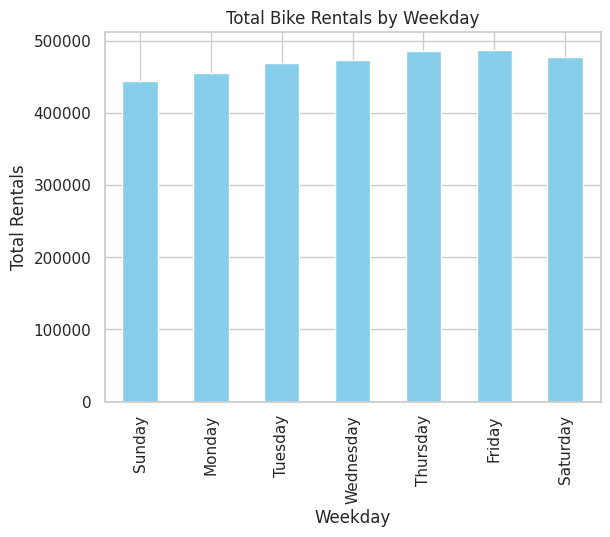

In [103]:
# Tampilkan hasil visualisasi
bar_chart_weekday(df_day)



> **Grafik batang** di atas menunjukkan total penyewaan sepeda berdasarkan hari dalam seminggu *(weekday*). Dari grafik, terlihat bahwa penyewaan sepeda relatif konsisten setiap hari, tanpa perbedaan yang signifikan antara hari kerja dan akhir pekan. Meskipun ada sedikit variasi, jumlah penyewaan sepeda tampaknya tersebar cukup merata di seluruh minggu, yang menunjukkan bahwa permintaan penyewaan sepeda tidak terlalu dipengaruhi oleh hari tertentu.



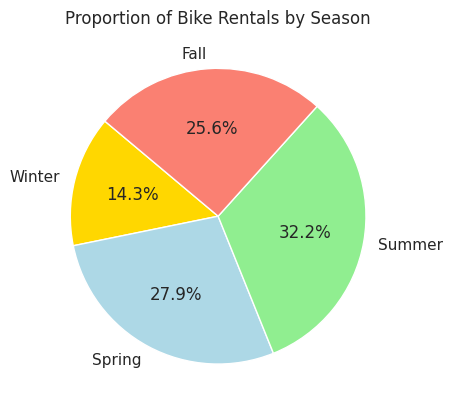

In [104]:
# Tampilkan hasil visualisasi
pie_chart_season(df_day)



> Dari **Grafik pie chart** ini, terlihat bahwa penyewaan sepeda paling tinggi terjadi pada musim panas (Summer) dengan persentase 32.2%, diikuti oleh musim semi (Spring) sebesar 27.9%, dan musim gugur (Fall) sebesar 25.6%. Musim dingin (Winter) memiliki persentase terendah, hanya 14.3%. Kesimpulannya, cuaca hangat di musim panas dan musim semi tampaknya lebih kondusif untuk aktivitas bersepeda, sehingga meningkatkan jumlah penyewaan sepeda. Sebaliknya, musim dingin dengan cuaca lebih dingin dan tidak ideal untuk bersepeda menunjukkan penurunan yang signifikan dalam permintaan.



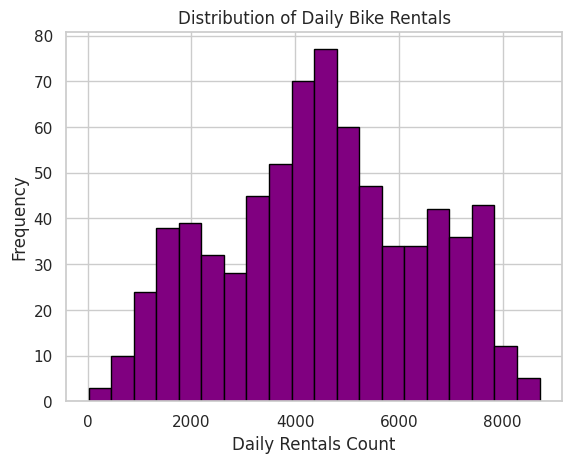

In [105]:
# Tampilkan hasil visualisasi
histogram_daily_rentals(df_day)



> **Histogram** menunjukkan bahwa jumlah penyewaan sepeda harian memiliki distribusi yang mendekati normal dengan puncak pada rentang sekitar 4000 hingga 5000 penyewaan per hari. Sebagian besar hari memiliki jumlah penyewaan yang moderat, dengan jumlah ekstrem (baik yang sangat rendah atau sangat tinggi) jarang terjadi. Hal ini menunjukkan bahwa permintaan harian cenderung stabil di sekitar nilai tengah, menunjukkan pola yang konsisten dalam penggunaan sepeda sehari-hari.



<ipython-input-102-c835bff65802>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season_mapped', y='temp', data=df, palette="Set2")


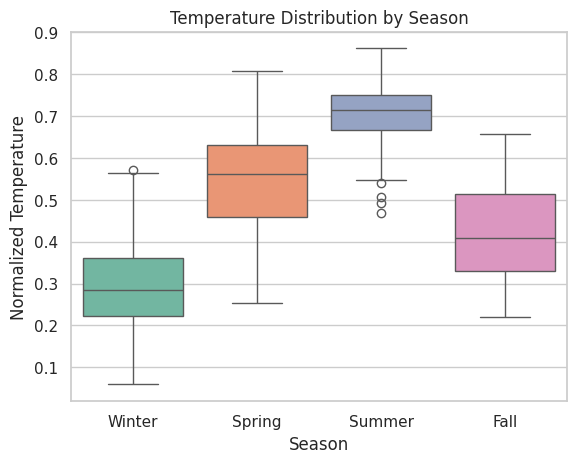

In [106]:
# Tampilkan hasil visualisasi
boxplot_temp_by_season(df_day)



> **Box plot** ini mengilustrasikan distribusi suhu yang dinormalisasi berdasarkan musim, di mana musim panas (Summer) memiliki median suhu tertinggi sekitar 0.7, sementara musim dingin (Winter) memiliki suhu terendah dengan median sekitar 0.3. Musim semi (Spring) dan musim gugur (Fall) berada di antara dua musim tersebut dalam hal suhu. Hal ini menunjukkan bahwa suhu bervariasi secara signifikan antar musim, dan musim panas dengan suhu yang lebih tinggi tampaknya lebih mendukung aktivitas luar ruangan seperti bersepeda, yang sesuai dengan tingginya persentase penyewaan sepeda di musim tersebut.



**Kesimpulan**

1. **Bar Chart (Total Penyewaan Sepeda Berdasarkan Weekday):**
   - **Interpretasi**: Data menunjukkan bahwa penyewaan sepeda relatif konsisten sepanjang minggu tanpa perbedaan signifikan antara hari kerja dan akhir pekan. Hal ini menyiratkan bahwa permintaan penyewaan sepeda tidak hanya bergantung pada waktu akhir pekan, sehingga strategi bisnis dapat difokuskan pada penawaran yang konsisten sepanjang minggu. Penyedia layanan dapat memastikan ketersediaan sepeda yang cukup setiap hari dan tidak perlu meningkatkan stok secara khusus di akhir pekan.

2. **Pie Chart (Proporsi Penyewaan Sepeda Berdasarkan Musim):**
   - **Interpretasi**: Musim panas (Summer) dan musim semi (Spring) memiliki proporsi penyewaan sepeda yang lebih tinggi dibandingkan musim gugur (Fall) dan musim dingin (Winter). Ini menunjukkan bahwa cuaca hangat secara signifikan meningkatkan minat masyarakat untuk bersepeda. Penyedia layanan dapat mempertimbangkan untuk menambah sepeda, menyediakan paket promosi, atau memperpanjang jam operasional selama musim panas dan musim semi, ketika permintaan diprediksi akan lebih tinggi.

3. **Histogram (Distribusi Jumlah Penyewaan Sepeda Harian):**
   - **Interpretasi**: Histogram menunjukkan bahwa sebagian besar hari memiliki jumlah penyewaan yang stabil di sekitar 4000 hingga 5000 penyewaan per hari. Permintaan harian yang konsisten ini menunjukkan bahwa bisnis penyewaan sepeda dapat merencanakan pengelolaan stok dan layanan secara efisien untuk memenuhi kebutuhan sehari-hari. Pengelola dapat menggunakan pola ini untuk mengoptimalkan biaya operasional dan perawatan sepeda sesuai tingkat permintaan harian.

4. **Box Plot (Distribusi Suhu Berdasarkan Musim):**
   - **Interpretasi**: Box plot menunjukkan bahwa suhu tertinggi terjadi pada musim panas, diikuti oleh musim semi dan gugur, sementara musim dingin memiliki suhu terendah. Mengingat musim panas dan musim semi dengan suhu yang lebih hangat cenderung meningkatkan aktivitas bersepeda, penyedia layanan dapat memfokuskan promosi, diskon, dan acara khusus pada musim-musim ini untuk menarik lebih banyak pelanggan. Selain itu, di musim dingin, penyedia layanan bisa mempertimbangkan penawaran alternatif atau pemeliharaan sepeda karena permintaan yang lebih rendah.